In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
OMP_NUM_THREADS=7


In [4]:
image_path = "../output_videos/player_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

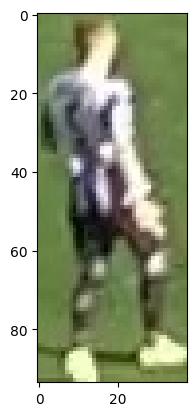

In [5]:
plt.imshow(image)
plt.show()

# take the top half of the image

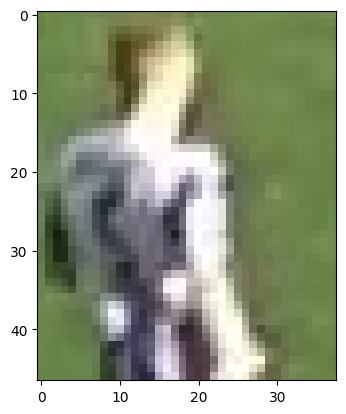

In [7]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

# cluster the image into 2 clusters

c:\Users\zhaoyang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


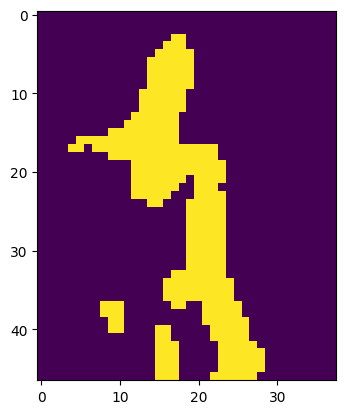

In [15]:
#reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

#perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#get the labels
labels = kmeans.labels_

#reshape the labels into the original image shape

clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display the clustered image

plt.imshow(clustered_image)
plt.show()

In [16]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]

non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)

print("Non player cluster: ", non_player_cluster)

Non player cluster:  0


In [17]:
player_cluster = 1 - non_player_cluster
print("Player cluster: ", player_cluster)

Player cluster:  1


In [18]:
kmeans.cluster_centers_[player_cluster]

array([223.59292035, 220.21533923, 212.59882006])